# Titanic CaseStudy

<img src='titanic-newspaper-headline.jpg' />

<h2><b> The Challenge From Kaggle</b></h2>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

<h3>We'll be trying to predict a classification- survival or deceased.</h3>

"""<h4> Kaggle Project Guidelines for Interview </h4>

Congratulations on making it through to the next round of the interview process! This round takes the form of a presentation on a model development project.

The project is based on the famous Kaggle Titanic project (https://www.kaggle.com/c/titanic). You will have a couple of days to prepare and then come do a 30 minute presentation on what you have done.

A few pointers:

•	Please work through the Titanic problem in the link above.  There is a lot of material available to assist you.

•	The aim is not to necessarily build a model (you are welcome to though), but to deliver a 30 minute presentation on the steps you would take to build a model

•	You can then select one of the steps and go into more detail and actual analysis (for example you can actually do the feature engineering and selection or take us though the pros and cons of various model estimation methods etc.)

•	You are welcome to use any platform/language to build up your analysis (no actual coding is required and the idea is definitely not for you to learn a new coding language)

•	You have complete artistic freedom in terms of the format of your presentation – be creative!

"""
 
<h3> Let's implement classification using Python.</h3>

Data has been semi - cleaned and downloaded from Kaggle link provided.

## Import Libraries
Let's import some libraries to get started! We will import other libraries as we go along.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Modeling Process 

<img src='modeling_process.png' />

## The Data
There are three files Test and train Data provided on Kaggle Link. Initial Merging of gender_submission and test file has been done already. Now we have only two files Test and train data.

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

Lets check the data and what is looks like.

In [3]:
test.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 12)


We have an option to directly go into EDA- Exploratory data analysis, Cleaning the data and then Modelling. However ,let's <b>concatenate</b> the both dataset, so that we will have more data to play with.

In [6]:
df = pd.concat([train,test],axis=0)

Lets check the shape once again.

Interesting fact is either the headline from above is incorrect or we do not have complete data of all passengers!

In [7]:
df.shape

(1309, 12)

In [8]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
136,1028,0,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


#### Data Description and Comments


1) The <b> Survived </b> variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. 

2) <b> The PassengerID and Ticket </b> variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.

3) The <b> Pclass </b> variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.

4) <b> The Name </b> variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we can explore further if title, like master, makes a difference.


5) The <b> Sex and Embarked </b> variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.

6) <b> The Age and Fare </b> variable are continuous quantitative datatypes.

7) <b>The SibSp </b> represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.


8) The <b> Cabin </b> variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.


Data Seemed to be concatenated properly, but I am observing some nulls value as well categorical features. Let's tackle this one by one. 

First Nulls value, lets make a heatmap which will give us a visual picture on where we have to focus for null values.

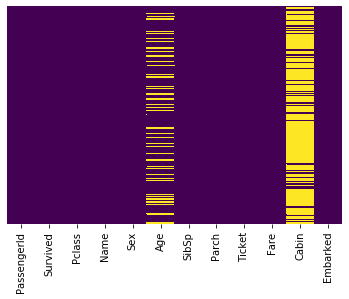

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 
# EDA

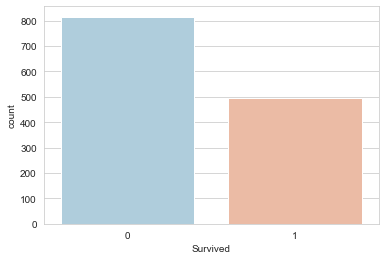

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

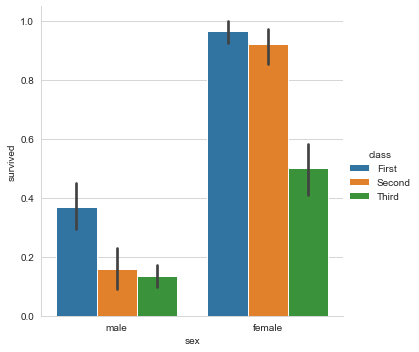

In [13]:
# Titanic data is available in other data sources. Picking data from Seaborn Library Package, this is just used for visualization.
titanic = sns.load_dataset('titanic')
sns.set_style('whitegrid')
sns.catplot(x='sex',y='survived',hue='class',kind='bar',data=titanic)

Lets see if Passenger class has something to be highlighted.

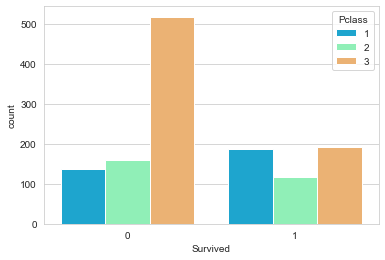

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

Lets check the age distribution.

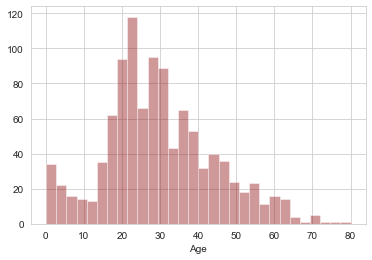

In [15]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

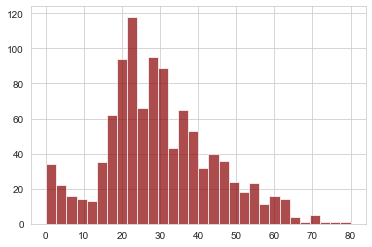

In [16]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

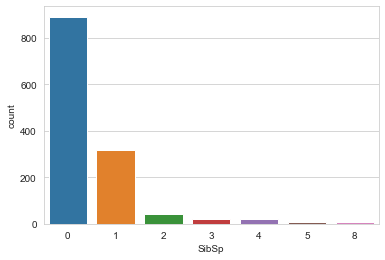

In [17]:
sns.countplot(x='SibSp',data=df)

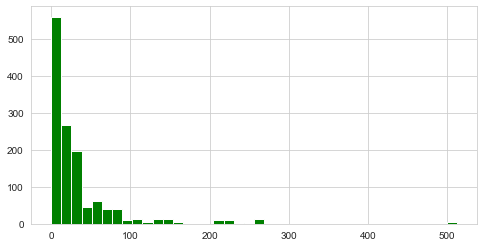

In [18]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

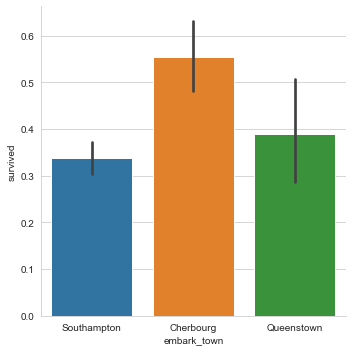

In [19]:
sns.catplot(x='embark_town',y='survived',kind='bar',data=titanic)

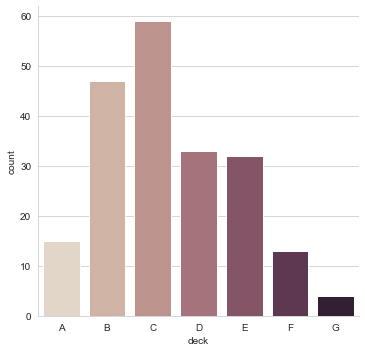

In [20]:
sns.catplot(x='deck',kind='count',palette="ch: .25",data=titanic)

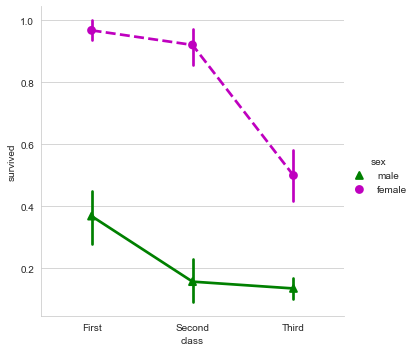

In [21]:
sns.catplot(x='class',y='survived',hue='sex',palette={'male':'g','female':'m'},markers=["^","o"],linestyles=['-','--'],kind='point',data=titanic)

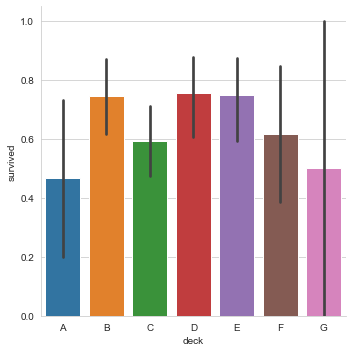

In [22]:
sns.catplot(x='deck',y='survived',kind='bar',data=titanic)

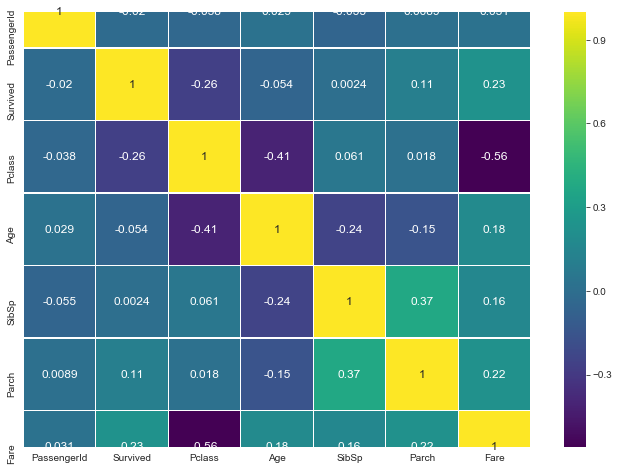

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',square=True,linewidths=0.1,linecolor='white',annot_kws={'fontsize':12})

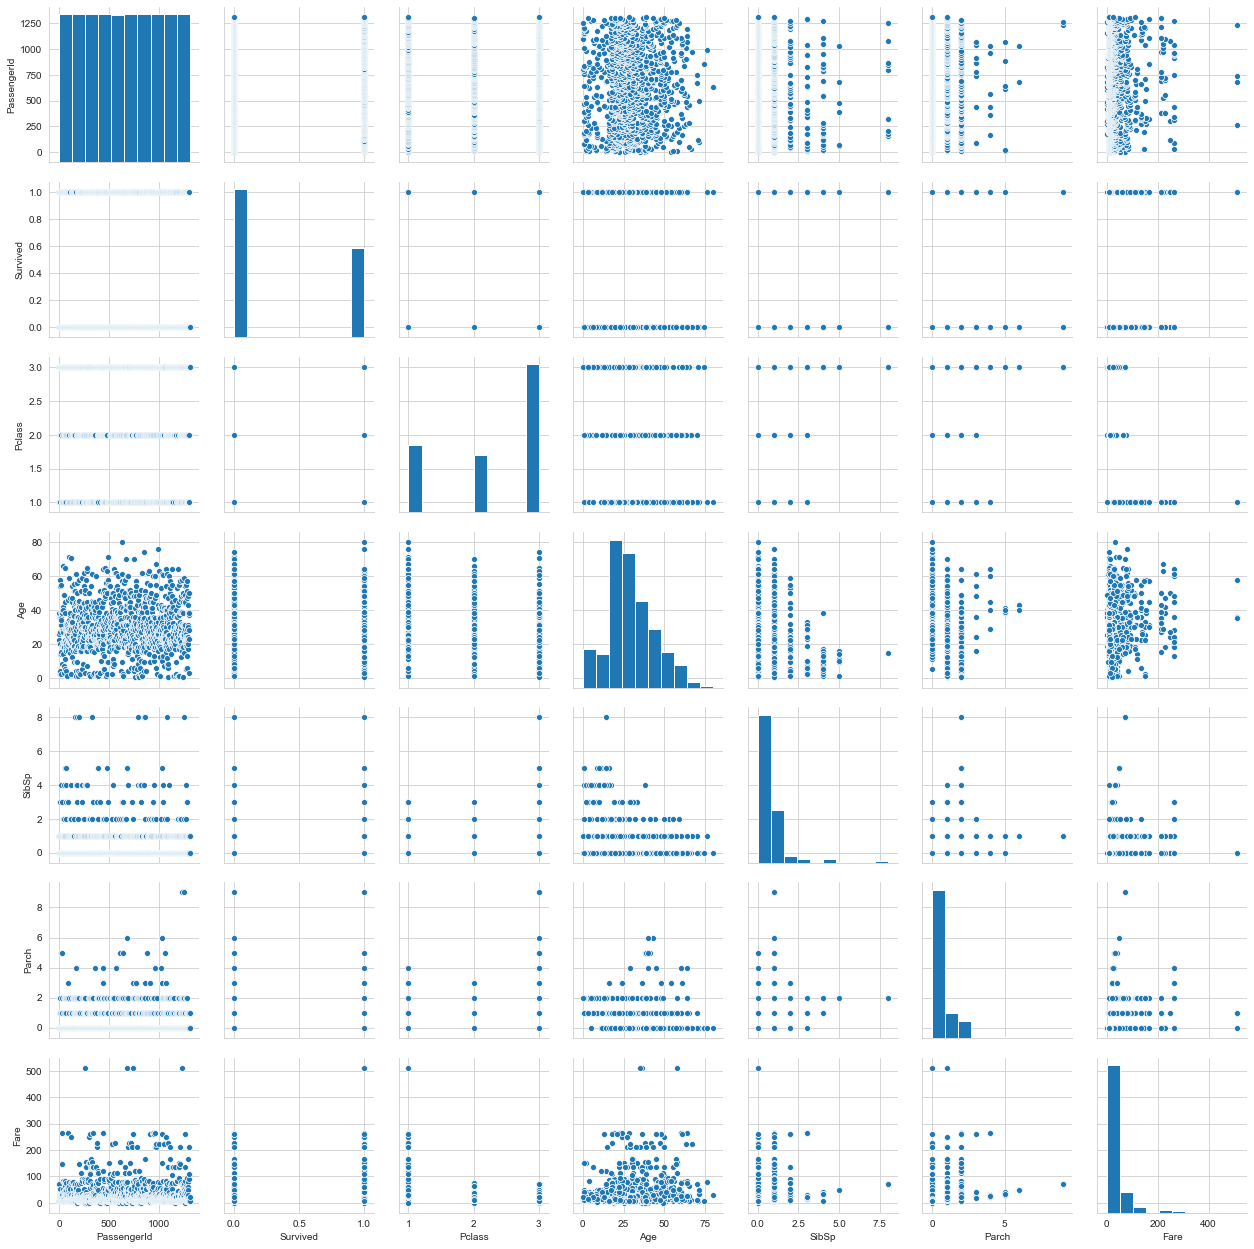

In [24]:
sns.pairplot(df)

## Data Cleaning
Earlier we observed that age and cabin features had some values missing. Lets tackle it and make it in machine readable format for further modelling. Lets check once just to be sure.

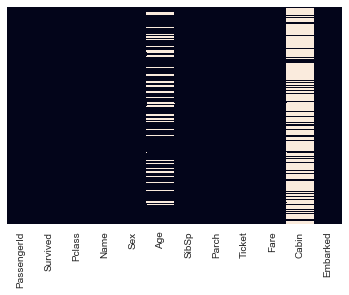

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,Cmap='viridis',cbar=False)

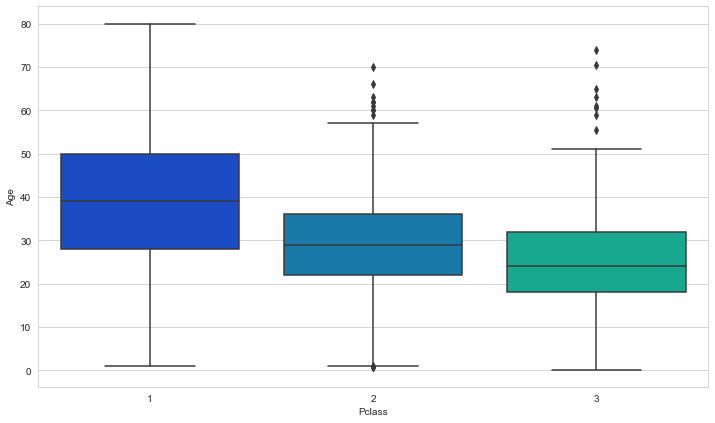

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [28]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

Now check the heatmap once again.

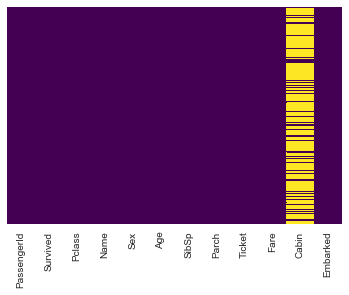

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's go ahead and drop the Cabin column, reason is that even if do imputation, it will not make sense.

In [30]:
df.drop('Cabin',axis=1,inplace=True)

In [31]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [32]:
# Just in case there is any other null value which is not picked in the visualization
df.dropna(inplace=True)

In [33]:
df.shape

(1306, 11)

Earlier Data was 1309 by 12. New Data is 1306 by 11

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1306 non-null int64
Survived       1306 non-null int64
Pclass         1306 non-null int64
Name           1306 non-null object
Sex            1306 non-null object
Age            1306 non-null float64
SibSp          1306 non-null int64
Parch          1306 non-null int64
Ticket         1306 non-null object
Fare           1306 non-null float64
Embarked       1306 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 122.4+ KB


In [35]:
#to get k-1 dummies out of k categorical levels by removing the first level to remove any redundancy
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

We are removing following columns from the data:

a. Sex - this column is being converted from categorical to numerical

b. Embarked - same as point (a)

c. Name - this can be debated as we may use this to carve out further features, like Mr, Miss, Master etc. can reflect some more insights, however as of now I am dropping it , so as to proceed to modelling quickly . Keeping time limit in mind.

d. Ticket - same as point (c)

e. PassengerId - this is a sequential number and may influence model with in appropriate weightable. Almost similar to index.

In [36]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [37]:
df.drop(['PassengerId'],axis=1, inplace=True)

In [38]:
df = pd.concat([df,sex,embark],axis=1)

In [39]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,1306.0,0.376723,0.484750,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1306.0,2.296325,0.837037,1.00,2.0000,3.0000,3.000,3.0000
Age,1306.0,29.092014,13.084819,0.17,22.0000,26.0000,36.375,80.0000
SibSp,1306.0,0.500000,1.042580,0.00,0.0000,0.0000,1.000,8.0000
Parch,1306.0,0.385911,0.866357,0.00,0.0000,0.0000,0.000,9.0000
Fare,1306.0,33.223956,51.765986,0.00,7.8958,14.4542,31.275,512.3292
male,1306.0,0.644717,0.478782,0.00,0.0000,1.0000,1.000,1.0000
Q,1306.0,0.094181,0.292192,0.00,0.0000,0.0000,0.000,1.0000
S,1306.0,0.699081,0.458833,0.00,0.0000,1.0000,1.000,1.0000


Great! Our data is ready for our model!

# Building a Classification Model's

Let's start by splitting our data into a training set and test set 

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

Now we can do Normalizing of this data using various Scaler , like StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler etc. However since, we have limited data and only one feature which seems to distributed differently - <b>Fare</b>. Hence we are not using Scaling out data as of now.


Also machine learning algorithmns, add regularization automatically so as to prevent overfitting.

Here X will be everything apart from Survived, Since that is our prediction

In [42]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)

#### Lets pick all classification models from Scikit Learn and run them together. We will then evaluate models based on there score, training time and prediction time. 

Basic idea behind taking these models is to <u>minimize cost function(reduction of errors vs actual)</u> . In this case, cost function metrics to be compared in f1-score.

There is no particular reason of picking top 3 apart from time given for presentation today. Other models can definitely be explored further.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
classifers = {
    "GradientBoosting":GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=1, random_state=0),
    "KNN(8)":KNeighborsClassifier(4),
    "Logistic_Regression": LogisticRegression(),
    "Decision_Tree": DecisionTreeClassifier(max_depth=8),
    "Random Forest": RandomForestClassifier(max_depth=7,n_estimators=10,max_features=4),
    "Neural_Net": MLPClassifier(alpha=1),
    "AdaBoost": AdaBoostClassifier(),
    "Naives_Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "RBFSVM": SVC(gamma=2, C=1),
    "linearSVC": LinearSVC(),
    "LinearSVM": SVC(kernel='linear'),
    "Gaussian_Process": GaussianProcessClassifier(1.0 * RBF(1.0))
}

#### Hyper Parameters for each model is picked basis on best practice recommendation.

Source :Sci-kit learn.

In [46]:
from time import time
nfast = 12

head = list(classifers.items())[:nfast]

for name,classifier in head:
    start = time()
    classifier.fit(X_train,y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test,y_test)
    score_time = time() - start
    print("{:<15} | score = {:.3f} | time = {:,.3f}s | {:,.3f}s".format(name,score,train_time,score_time))

GradientBoosting | score = 0.859 | time = 0.062s | 0.000s
KNN(8)          | score = 0.694 | time = 0.000s | 0.016s
Logistic_Regression | score = 0.859 | time = 0.000s | 0.000s
Decision_Tree   | score = 0.840 | time = 0.016s | 0.000s
Random Forest   | score = 0.854 | time = 0.016s | 0.000s
Neural_Net      | score = 0.854 | time = 0.828s | 0.000s
AdaBoost        | score = 0.859 | time = 0.078s | 0.016s
Naives_Bayes    | score = 0.844 | time = 0.016s | 0.000s
QDA             | score = 0.849 | time = 0.000s | 0.000s
RBFSVM          | score = 0.658 | time = 0.062s | 0.016s
linearSVC       | score = 0.780 | time = 0.062s | 0.000s
LinearSVM       | score = 0.859 | time = 28.154s | 0.016s


<b>WHAT is a score?</b> - it basically weighted average of f1-score. Please see the illustrative example for Logistic Regression given below.

first time is training the model time in seconds.

second time is testing the model time in seconds.

In [47]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
# Give information above accuracy, precision and recall.
print(classification_report(y_test,y_pred))
# Print a contigency table to highlight how well are we doing.
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       256
           1       0.85      0.77      0.81       162

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418

[[234  22]
 [ 37 125]]


<u>More about f1-score.</u>

F1 score is denoted by the formula <b> 2 X ((precision X recall)/(precision + recall))</b>

<b> Precision = (True Positive)/(True Positive + False Positive)</b> i.e. what proportion of positive identifications was actually correct?

<b>Recall = (True Positive)/(True Positive + False Negative) </b> i.e. what proportion of positive identifications was identified correctly?

F1 - score conveys the balance between precision and recall as denoted above.

### Coming back to Model Selection.

Based on Score, Train time and Test time. Following algorithmns/ models should be explored:

a. LogisticRegression  

b. Gradient Boosting

c. RandomForestClassifier

d. Linear SVM

f. Neural Net

### This is something in which can be a subject to debate and further research. However based on time, I am proceeding with LogisticRegression, Gradient Boosting, RandomForestClassifier.

### First Model - Logistic Regression

To improve the <b>classifier score </b> further with this model, we will use Cross Validation, Hyperparameter Tuning and  feature engineering(further requirement). Idea is to get have least amount of <b> False Positive</b> which will come vis a vis improvement in classifier score. 

In [48]:
from sklearn.linear_model import LogisticRegressionCV

Cross Validation basically refers to creating more than one subset of data. i.e. We created on test and train above, however here we have making five subsets of entire data and training the model further.

In [49]:
clf = LogisticRegressionCV(cv=5, solver='liblinear',random_state=42).fit(X, y)

In [50]:
y_pred = clf.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       256
           1       0.86      0.77      0.81       162

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418



[[235  21]
 [ 37 125]]


So basically there is no improvement in results!! Let's try hyperparameter tuning and see if we can get some more juice out of this.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameters = {
    'solver': ['lbfgs','liblinear','sag','saga'],
}

grid =  GridSearchCV(LogisticRegression(), parameters)
# Best fit over cross-product of parameter space, cross-validated
model = grid.fit(X, y)
model

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')
print(model.best_score_)

{'solver': 'liblinear'} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) 

0.8453292496171516


There a lot of other hyperparameters we can work on to improve the score further. However keeping the time in mind, I am proceeding with next Model. Hyperparameters are mentioned above like regularization etc.

In [55]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       256
           1       0.86      0.77      0.81       162

    accuracy                           0.86       418
   macro avg       0.86      0.85      0.85       418
weighted avg       0.86      0.86      0.86       418



[[236  20]
 [ 37 125]]


### Second Model - Gradient Boosting

In [78]:
parameters = {'loss': ['deviance','exponential'],
              'criterion': ['mae', 'mse','friedman_mse'],
              'max_depth': range(2,5,1),
              'random_state':range(40,100,2)
             }

grid =  GridSearchCV(GradientBoostingClassifier(), parameters)
# Best fit over cross-product of parameter space, cross-validated
model = grid.fit(X, y)
model

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_it...
                                                  presort='auto',
  

In [79]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')
print(model.best_score_)

{'criterion': 'mae', 'loss': 'exponential', 'max_depth': 4, 'random_state': 76} 

GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.1,
                           loss='exponential', max_depth=4, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           presort='auto', random_state=76, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False) 

0.8560490045941807


In [ ]:
y_pred = model.predict(X_test)

In [81]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       201
           1       0.86      0.78      0.82       126

    accuracy                           0.87       327
   macro avg       0.86      0.85      0.86       327
weighted avg       0.87      0.87      0.86       327



[[185  16]
 [ 28  98]]


### Third model - RandomForestClassifier

In [82]:
parameters = {'n_estimators': range(1, 18, 2),
              'criterion': ['gini', 'entropy'],
              'max_depth': range(1,15,1),
              'max_features': ['auto','sqrt','log2']
             }

grid =  GridSearchCV(RandomForestClassifier(), parameters)
# Best fit over cross-product of parameter space, cross-validated
model = grid.fit(X, y)
model

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [61]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')
print(model.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 9} 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

0.8606431852986217


In [62]:
y_pred = model.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       256
           1       0.87      0.77      0.81       162

    accuracy                           0.86       418
   macro avg       0.86      0.85      0.85       418
weighted avg       0.86      0.86      0.86       418



[[237  19]
 [ 38 124]]


#### Lets put all the result for this model in a dataframe,  and see for comparison, how many models were compared.

In [64]:
(pd.DataFrame(model.cv_results_)
   .set_index('rank_test_score')
   .sort_index()
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,
1,0.010409,0.007360,0.000000,0.000000,gini,3,auto,9,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.816514,0.788506,0.977011,0.860643,0.083029
2,0.000000,0.000000,0.010416,0.007365,gini,4,log2,3,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.814220,0.806897,0.951724,0.857580,0.066599
3,0.005208,0.007365,0.010415,0.007365,entropy,2,log2,9,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.805046,0.770115,0.990805,0.855283,0.096829
3,0.015624,0.000017,0.000000,0.000000,entropy,2,sqrt,11,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.805046,0.777011,0.983908,0.855283,0.091617
5,0.015626,0.000021,0.005207,0.007363,gini,4,sqrt,15,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.811927,0.795402,0.956322,0.854518,0.072261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.005209,0.007366,0.000000,0.000000,entropy,1,log2,1,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.802752,0.648276,0.547126,0.666156,0.105141
753,0.000000,0.000000,0.005208,0.007366,entropy,2,sqrt,1,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.635321,0.708046,0.648276,0.663859,0.031672
754,0.000000,0.000000,0.005203,0.007358,entropy,1,auto,3,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.649083,0.625287,0.645977,0.640123,0.010560


A total of <b>756 models</b> were compared for RandomForestClassifier and should be a similar story for others as well.

## Feature engineering  - Part 1, Eliminating Features(if required)

Based on timings, I will just focus on one model. Below, we are applying the best model found with features to see how many features should we keep to eliminate further. 

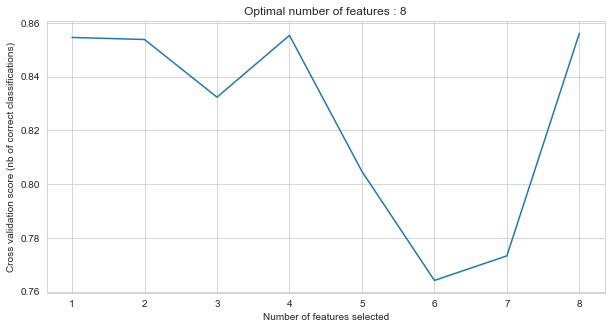

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

So basically the question of feature selection in final model can be answered from below(if required)

In [66]:
print(X.columns)
print(rfecv.support_)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')
[ True  True  True  True  True  True  True  True]


## Feature engineering  - Part 2, Creating features(if required)

We are using a technique called polynomial features . Basically using a formula 

<b>'#Features = N + N + (N X(N-1))/2 + 1</b>

E.g. for degree=30, it is 496; for degree=100, it is 5151

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X.shape, X_poly.shape

((1306, 8), (1306, 45))

In [68]:
poly_names = poly.get_feature_names(X.columns)
pd.DataFrame(X_poly, columns=poly_names).head()

,1,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Pclass^2,Pclass Age,Pclass SibSp,Pclass Parch,Pclass Fare,Pclass male,Pclass Q,Pclass S,Age^2,Age SibSp,Age Parch,Age Fare,Age male,Age Q,Age S,SibSp^2,SibSp Parch,SibSp Fare,SibSp male,SibSp Q,SibSp S,Parch^2,Parch Fare,Parch male,Parch Q,Parch S,Fare^2,Fare male,Fare Q,Fare S,male^2,male Q,male S,Q^2,Q S,S^2
0,1.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,9.0,66.0,3.0,0.0,21.7500,3.0,0.0,3.0,484.0,22.0,0.0,159.5000,22.0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.562500,7.25,0.0,7.250,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,1444.0,38.0,0.0,2708.7654,0.0,0.0,0.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5081.308859,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,9.0,78.0,0.0,0.0,23.7750,0.0,0.0,3.0,676.0,0.0,0.0,206.0500,0.0,0.0,26.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.805625,0.00,0.0,7.925,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1225.0,35.0,0.0,1858.5000,0.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2819.610000,0.00,0.0,53.100,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,9.0,105.0,0.0,0.0,24.1500,3.0,0.0,3.0,1225.0,0.0,0.0,281.7500,35.0,0.0,35.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.802500,8.05,0.0,8.050,1.0,0.0,1.0,0.0,0.0,1.0


Feature ranking with recursive feature elimination.

In [69]:
from sklearn.feature_selection import RFE
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfe = RFE(estimator=rfc, n_features_to_select=50, step=1)

X_poly_top = rfe.fit_transform(X_poly,y)
X_poly_top.shape

(1306, 45)

In [70]:
pd.Series(rfe.ranking_, index=poly_names).sort_values(ascending=False).head(10)

S^2             1
Age male        1
Age Parch       1
Age SibSp       1
Age^2           1
Pclass S        1
Pclass Q        1
Pclass male     1
Pclass Fare     1
Pclass Parch    1
dtype: int32

In [71]:
from sklearn.preprocessing import StandardScaler
X_poly_top_scaled = StandardScaler().fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly_top_scaled, y, random_state=42)

rfc.fit(X_train, y_train).score(X_test, y_test)

0.8654434250764526

We have used Scaling here as number of features have increased drastically , and scaling will keep things normalized and will run faster.

In [72]:
y_pred = rfc.predict(X_test)

In [73]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       201
           1       0.86      0.78      0.82       126

    accuracy                           0.87       327
   macro avg       0.86      0.85      0.86       327
weighted avg       0.87      0.87      0.86       327



[[185  16]
 [ 28  98]]


Therefore based on all the models run as well as various cross validation we can take into account . The model with least amount of False Positive,False Negative or F1-score based on situation. (Or 21 other metrics waiting to be checked)

<b>This in no way means infers that modeling is complete,</b> there are various other things which can be looked at:

a. Other models which gave almost results but in the process of elimination ,we eliminated them.

b. Features which have been dropped , for e.g. 

* the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

This will require Text Engineering with maybe a hint of Natural Language Processing. 

c. Finding the balance of the data with more features can also be another idea which can be explored further.

<b>Finally,</b> here is the thought process which I follow for modelling or solving problems.

### Thank you for the opportunity to present to such an esteemed audience. I can assure you that I will leave no stones unturned in order to come upto to your expectations!!